# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API call
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | newnham
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | villa presidente frei, nunoa, santiago, chile
City not found. Skipping...
Processing Record 5 of Set 1 | paita
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | khorixas
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | letterkenny
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | turinsk
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ambato
Processing Record 20 of Set 1 | saint-pierre
Proc

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,4.98,70,100,1.65,GL,1714061808
1,newnham,-41.3833,147.1333,5.93,87,5,0.00,AU,1714061809
2,wailua homesteads,22.0669,-159.3780,22.44,84,100,7.72,US,1714061810
3,paita,-5.0892,-81.1144,24.82,69,35,3.81,PE,1714061813
4,bethel,41.3712,-73.4140,12.53,34,0,2.57,US,1714061801


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,4.98,70,100,1.65,GL,1714061808
1,newnham,-41.3833,147.1333,5.93,87,5,0.00,AU,1714061809
2,wailua homesteads,22.0669,-159.3780,22.44,84,100,7.72,US,1714061810
3,paita,-5.0892,-81.1144,24.82,69,35,3.81,PE,1714061813
4,bethel,41.3712,-73.4140,12.53,34,0,2.57,US,1714061801


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

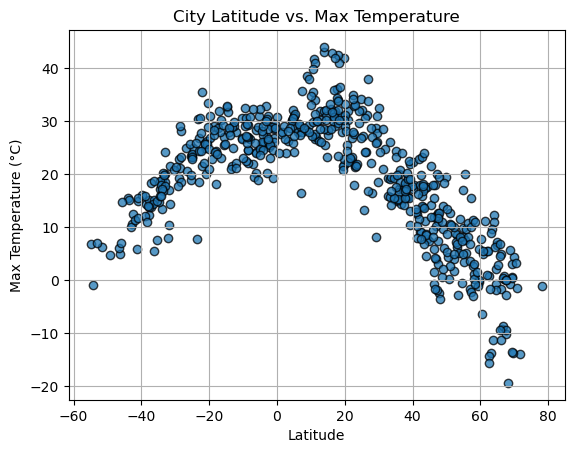

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

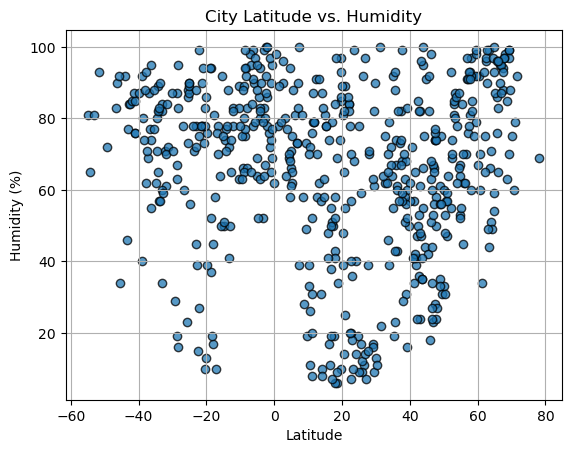

In [56]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

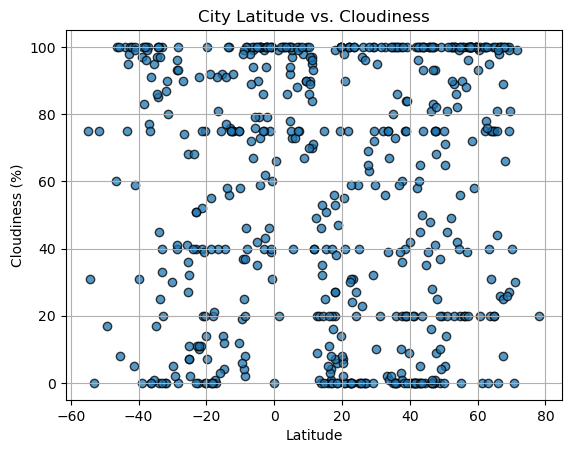

In [58]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

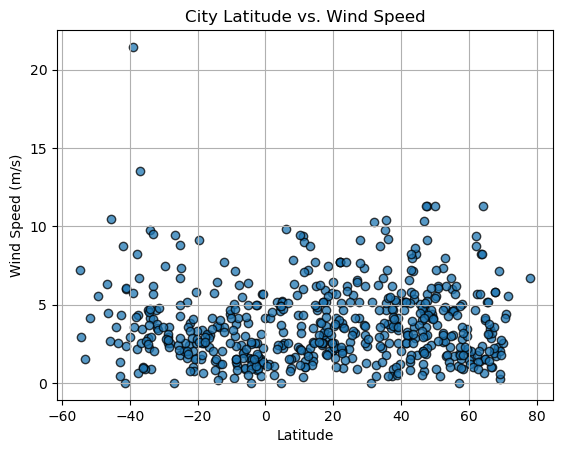

In [60]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Display the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Display plot
    plt.show()


In [74]:
# Create DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,4.98,70,100,1.65,GL,1714061808
2,wailua homesteads,22.0669,-159.3780,22.44,84,100,7.72,US,1714061810
4,bethel,41.3712,-73.4140,12.53,34,0,2.57,US,1714061801
5,bandarbeyla,9.4942,50.8122,29.26,73,90,4.36,SO,1714061815
8,anadyr,64.7500,177.4833,-0.72,93,75,4.00,RU,1714061820


In [66]:
# Create DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,newnham,-41.3833,147.1333,5.93,87,5,0.00,AU,1714061809
3,paita,-5.0892,-81.1144,24.82,69,35,3.81,PE,1714061813
6,puerto natales,-51.7236,-72.4875,6.25,93,75,4.12,CL,1714061781
7,khorixas,-20.3667,14.9667,33.53,10,0,1.59,NaN,1714061819
9,arraial do cabo,-22.9661,-42.0278,26.92,78,40,5.14,BR,1714061714


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7652533170972481


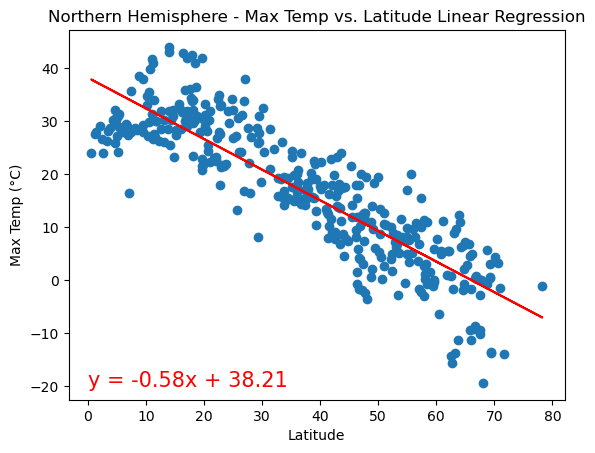

In [70]:
#linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (°C)", (0, -20))


The r-value is: 0.4121057168607245


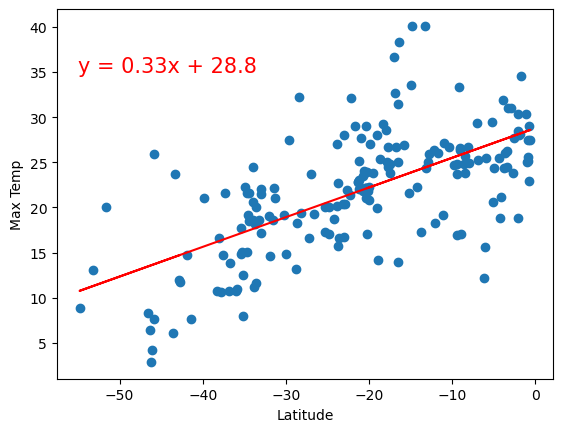

In [16]:
#linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (°C)", (-30, 10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06623482939405362


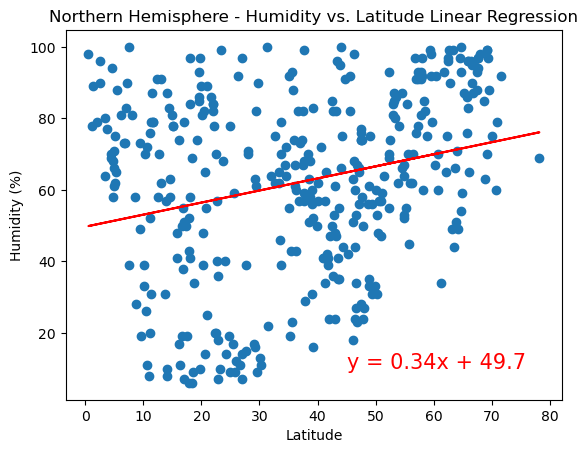

In [76]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (45, 10))


The r-squared is: 0.007784596857536596


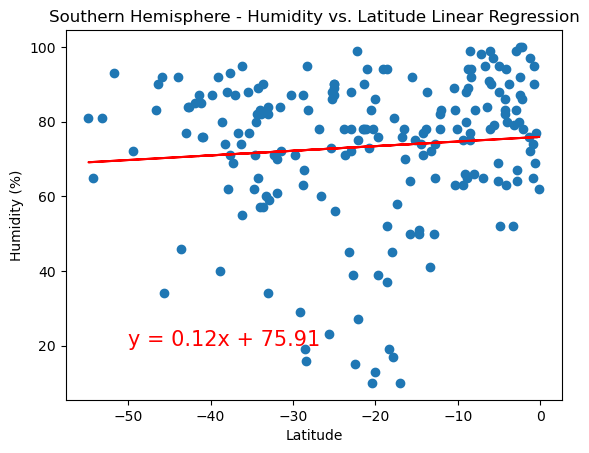

In [84]:
#Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (-50, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Perform linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (45, 10))
### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004218435239588948


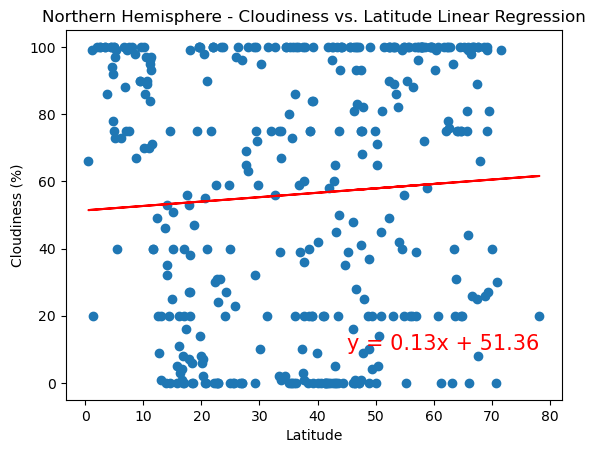

In [86]:
#Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (45, 10))


The r-squared is: 0.005579722988528324


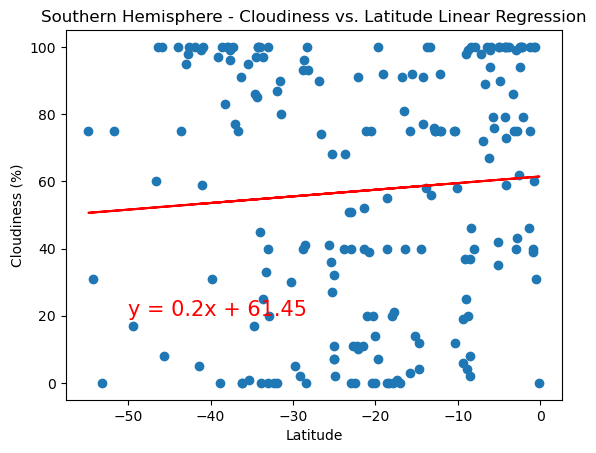

In [88]:
#Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


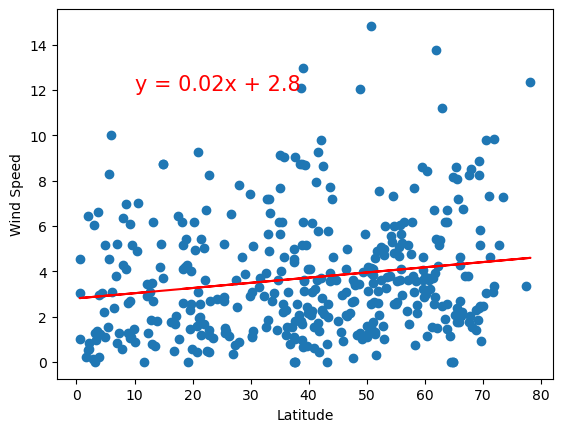

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (m/s)", (45, 10))


The r-squared is: 0.08985951316805153


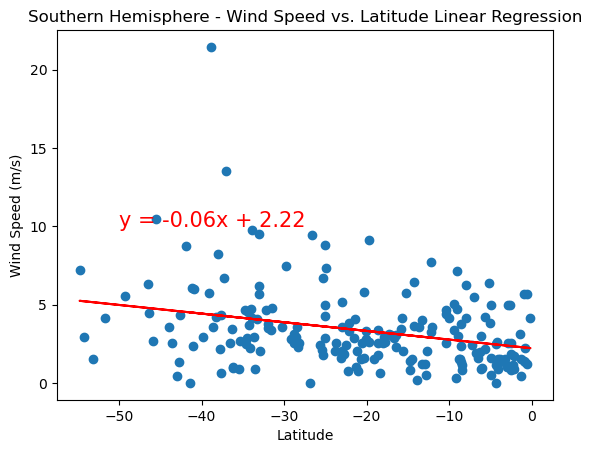

In [90]:
# Perform linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (m/s)", (-50, 10))


**Discussion about the linear relationship:** on the graph of temperature vs latitude the Northern Hemisphere, has an inverse relationship between latitude and temperature. on the graph of humitidity vs latitude it doesn't seem to be a relationship or not a significant one. on cloudiness vs latitude there is also not a clear relationship since other factors such as humidity also influence on this and maybe more than latitude and i would say that there is a similar case on latitude vs wind speed since many external factor such as topography can influence or affect it and not necessary just latitude